In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')

In [5]:
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
ip_address.head(5)

NameError: name 'ip_address' is not defined

In [10]:
print(fraud_data.isnull().sum())


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [12]:
fraud_data = fraud_data.drop_duplicates()

In [13]:
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])


In [15]:
fraud_data['purchase_value'] = fraud_data['purchase_value'].astype(float)

In [16]:
fraud_data['age'] = fraud_data['age'].astype(int)

In [18]:
print(fraud_data['age'])

0         39
1         53
2         53
3         41
4         45
          ..
151107    28
151108    32
151109    26
151110    37
151111    38
Name: age, Length: 151112, dtype: int64


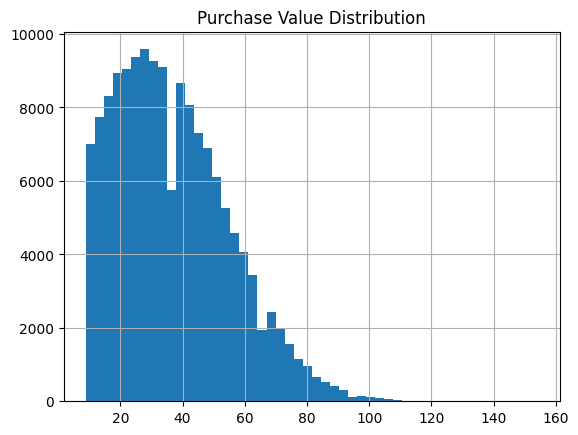

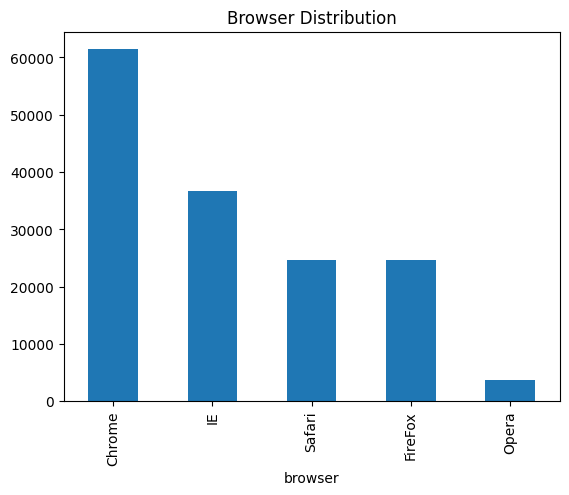

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numeric features
fraud_data['purchase_value'].hist(bins=50)
plt.title('Purchase Value Distribution')
plt.show()

# Univariate analysis for categorical features
fraud_data['browser'].value_counts().plot(kind='bar')
plt.title('Browser Distribution')
plt.show()


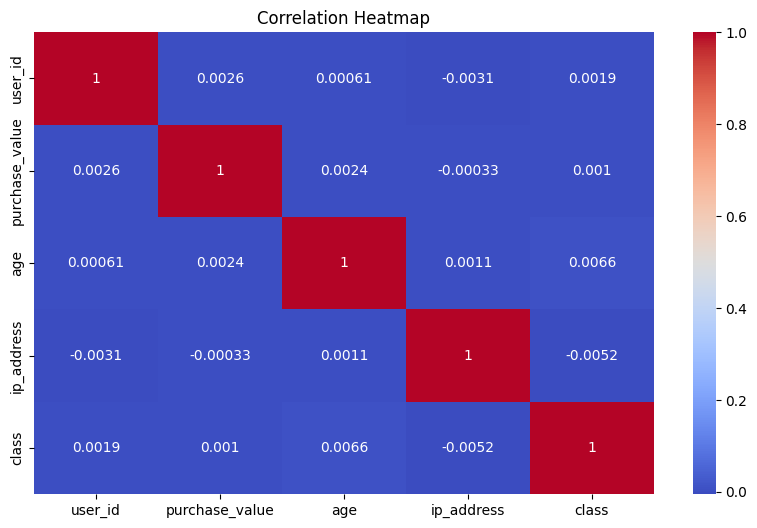

In [11]:
numeric_data = fraud_data.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
import ipaddress

# Convert IP addresses to integer
fraud_data['ip_address'] = fraud_data['ip_address'].apply(lambda x: int(ipaddress.ip_address(x)))

ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(lambda x: int(ipaddress.ip_address(x)))
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].apply(lambda x: int(ipaddress.ip_address(x)))


ValueError: 732758368.79972 does not appear to be an IPv4 or IPv6 address

In [24]:
# Merge fraud data with IP data
fraud_data = pd.merge(
    fraud_data,
    ip_data,
    how='left',
    left_on='ip_address',
    right_on='lower_bound_ip_address'
)


In [25]:
# Transaction frequency (number of transactions per user)
fraud_data['transaction_frequency'] = fraud_data.groupby('user_id')['user_id'].transform('count')

# Transaction velocity (time difference between signup and purchase)
fraud_data['transaction_velocity'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [26]:
# Hour of the day when purchase was made
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour

# Day of the week when purchase was made
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


AttributeError: Can only use .dt accessor with datetimelike values

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize `purchase_value` and `transaction_velocity`
fraud_data[['purchase_value', 'transaction_velocity']] = scaler.fit_transform(
    fraud_data[['purchase_value', 'transaction_velocity']]
)


KeyError: "['transaction_velocity'] not in index"

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode `browser`, `source`, and `sex`
label_enc = LabelEncoder()
fraud_data['browser'] = label_enc.fit_transform(fraud_data['browser'])
fraud_data['source'] = label_enc.fit_transform(fraud_data['source'])
fraud_data['sex'] = label_enc.fit_transform(fraud_data['sex'])
